# Logistic regression

### Dataset: German Credit

- Creditability: 1- Person is not at risk, 0- Pesron is at risk(defaulter)

- CreditAmount: Amount for which credit was given (Euro)

- DurationOfCreditInMonths: Duration for which the credit is given in months

# Objective

Estimate probabilities whether a person would default or not using logistic regression

# 1. Load Libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('German_Credit.xlsx')

# 2. Check how many records do we have


In [4]:
len(data)

1000

# 3. Plot Histogram for column 'CreditAmount'

In [7]:
data['CreditAmount']

0       1049
1       2799
2        841
3       2122
4       2171
       ...  
995     1987
996     2303
997    12680
998     6468
999     6350
Name: CreditAmount, Length: 1000, dtype: int64

(array([ 26.,  87., 124., 121.,  87.,  84.,  63.,  54.,  43.,  49.,  31.,
         24.,  19.,  16.,   7.,  16.,  22.,  14.,  11.,  17.,  13.,   7.,
          7.,   4.,   7.,   5.,   2.,   5.,   3.,   4.,   1.,   4.,   4.,
          2.,   3.,   1.,   0.,   2.,   3.,   2.,   1.,   0.,   3.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  250.  ,   613.48,   976.96,  1340.44,  1703.92,  2067.4 ,
         2430.88,  2794.36,  3157.84,  3521.32,  3884.8 ,  4248.28,
         4611.76,  4975.24,  5338.72,  5702.2 ,  6065.68,  6429.16,
         6792.64,  7156.12,  7519.6 ,  7883.08,  8246.56,  8610.04,
         8973.52,  9337.  ,  9700.48, 10063.96, 10427.44, 10790.92,
        11154.4 , 11517.88, 11881.36, 12244.84, 12608.32, 12971.8 ,
        13335.28, 13698.76, 14062.24, 14425.72, 14789.2 , 15152.68,
        15516.16, 15879.64, 16243.12, 16606.6 , 16970.08, 17333.56,
        17697.04, 18060.52, 18424.  ]),
 <a list of 50 Patch objects>)

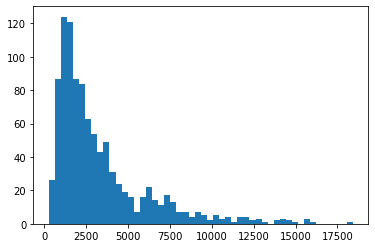

In [12]:
plt.hist(data['CreditAmount'],bins = 50)

# 4. Convert 'CreditAmount' into a categorical feature by grouping with start and end of interval as:
-  (0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000)

In [14]:
bin_edges = [0, 500, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 15000, 20000]
bin_labels = ['0-500', '501-1000', '1001-1500','1501-2000', '2001-2500', '2501-5000',
              '5001-7500','7501-10000', '10001-15000', '15001-20000']
data['CreditAmount'] = pd.cut(data['CreditAmount'], bins = bin_edges, labels=bin_labels)

In [15]:
data['CreditAmount']

0        1001-1500
1        2501-5000
2         501-1000
3        2001-2500
4        2001-2500
          ...     
995      1501-2000
996      2001-2500
997    10001-15000
998      5001-7500
999      5001-7500
Name: CreditAmount, Length: 1000, dtype: category
Categories (10, object): [0-500 < 501-1000 < 1001-1500 < 1501-2000 ... 5001-7500 < 7501-10000 < 10001-15000 < 15001-20000]

# 5. Create histogram to represent count of different 'Creditability' under each group of 'CreditAmount'

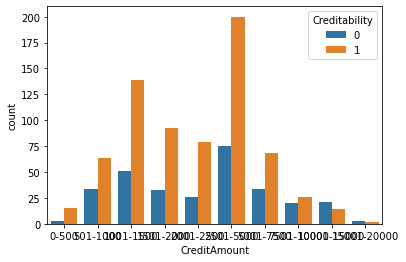

In [16]:
sns.countplot(x = 'CreditAmount', data= data, hue = 'Creditability')

# 6. Find out total number Creditability in each interval of CreditAmount

In [17]:
data.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1001-1500,18
1,1,2501-5000,9
2,1,501-1000,12
3,1,2001-2500,12
4,1,2001-2500,12


In [26]:
data.groupby(by='CreditAmount').agg({'Creditability': ['count']})

,Creditability
,count
CreditAmount,
0-500,18
501-1000,98
1001-1500,190
1501-2000,126
2001-2500,105
2501-5000,275
5001-7500,102
7501-10000,46


# 7. Find out total number of Creditability where Creditability is '0' and Creditability is '1' in each interval of CreditAmount

In [27]:
pd.crosstab(data['CreditAmount'], data['Creditability'])

Creditability,0,1
CreditAmount,,
0-500,3,15
501-1000,34,64
1001-1500,51,139
1501-2000,33,93
2001-2500,26,79
2501-5000,75,200
5001-7500,34,68
7501-10000,20,26
10001-15000,21,14


# 8. Prepare input data for the model

In [32]:
data['CreditAmount'] =  data['CreditAmount'].cat.codes

In [33]:
data['CreditAmount'].unique()

array([2, 5, 1, 4, 6, 3, 7, 0, 8, 9], dtype=int8)

### Separate dependent and independent variables

In [38]:
data.iloc[:, 1:]

,CreditAmount,DurationOfCreditInMonths
0,2,18
1,5,9
2,1,12
3,4,12
4,4,12
...,...,...
995,3,24
996,4,24
997,8,21
998,6,12


In [46]:
X = data.iloc[:, 1:]
y = data['Creditability'].astype('category')

In [48]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Creditability, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

### Split data into train and test

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# 9. Predict Target Variable for Test Data using Sklearn

In [50]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=7)
lr.fit(x_train, y_train)

LogisticRegression(random_state=7)

# 10. Try calculating Probabilities of Target using Sklearn

In [55]:
z = pd.DataFrame()                                               # creating a new dataframe
z['Actual'] = y_test.values                                      # Storing actual output of target variable

z['Probaility that output is 0'] = lr.predict_proba(x_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = lr.predict_proba(x_test)[:,1]

z['Predicted'] = lr.predict(x_test)                               # Predicting target variable using sklearn Logistic regression

z.head()

# In sklearn default threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
0,0,0.339347,0.660653,1
1,1,0.304411,0.695589,1
2,1,0.218914,0.781086,1
3,1,0.205677,0.794323,1
4,1,0.288284,0.711716,1


# 11. Build a confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [59]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

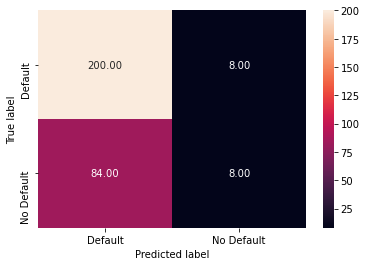

In [60]:
draw_cm( z['Actual'], z['Predicted'] )
# draw_cm( y_test, lr.predict(X_test) )

In [61]:
confusion_matrix( z['Actual'], z['Predicted'], [1,0] )

array([[200,   8],
       [ 84,   8]], dtype=int64)

# 12.  Predicted Probability distribution Plots for defaulters and non defaulters

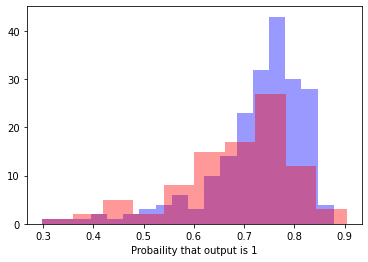

In [63]:
sns.distplot( z[z['Actual'] == 1]["Probaility that output is 1"], kde=False, color = 'b' )
sns.distplot( z[z['Actual'] == 0]["Probaility that output is 1"], kde=False, color = 'r' )
#plt.show()